**Veriye Ilk Bakis**


In [1]:
import seaborn as sns
planets = sns.load_dataset("planets")

In [2]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [3]:
#veri setinin hikayesi nedir ?

In [4]:
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [5]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [6]:
#veri seti yapisal bilgileri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [7]:
df.dtypes   # object olanlarin kategoriksel yapiya donusturulmesi bazi fonksiyonlar icin islevli

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [8]:
import pandas as pd
df.method = pd.Categorical(df.method)

In [9]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

**Veri Setinin Betimlenmesi**

In [10]:
df.describe().T   #describe fonksiyonu eksik gozlemleri ve kategorik yapilari goz ardi eder

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [11]:
df.shape

(1035, 6)

In [12]:
#hic eksik gozlem(deger) var mi ?
df.isnull().values.any()

True

In [13]:
#hangi degiskende kacar tane var ?
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [14]:
#df["degisken_ismi"].fillna(0, inplace ="True")  eksik olanlara sifiri bas

In [15]:
#df["degisken_ismi"].fillna(df.degisken_ismi.mean(), inplace="True") eksiklere ortalama degeri koy

**Sadece Kategorik Degiskenler ve Ozetleri**

In [16]:
kat_df= df.select_dtypes(include = ["category"])
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


**Kategorik Degiskenlerin Siniflarina ve Sinif Sayisina Eriselim**

In [17]:
kat_df.method.unique()

['Radial Velocity', 'Imaging', 'Eclipse Timing Variations', 'Transit', 'Astrometry', 'Transit Timing Variations', 'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing', 'Pulsation Timing Variations']
Categories (10, object): ['Astrometry', 'Eclipse Timing Variations', 'Imaging', 'Microlensing', ..., 'Pulsation Timing Variations', 'Radial Velocity', 'Transit', 'Transit Timing Variations']

In [18]:
kat_df["method"].value_counts().count()

10

**Kategorik degiskenin siniflarinin frekanslarina erismek (hangisinden kacar tane var)**

In [19]:
kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

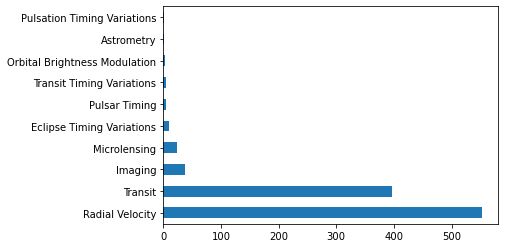

In [20]:
df["method"].value_counts().plot.barh();

**Surekli Degisken Ozetleri**

In [21]:
df_num = df.select_dtypes(include=["float64","int64"])

In [22]:
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [23]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [24]:
df_num["distance"].describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [25]:
print("Ortalama:" + str(df_num["distance"].mean()))
print("Dolu Gozlem Sayisi:" + str(df_num["distance"].count()))
print("Maksimum Deger: " + str(df_num["distance"].max()))
print("Medyan: " + str(df_num["distance"].median()))
print("Standart Sapma: " + str(df_num["distance"].std()))

Ortalama:264.06928217821786
Dolu Gozlem Sayisi:808
Maksimum Deger: 8500.0
Medyan: 55.25
Standart Sapma: 733.1164929404422


**Dagilim Grafikleri**

In [26]:
# gorsel teknikler ile surekli yani sayisal verilerin dagilimi gosteriri

**Barplot: sutun grafik teknigi -elimizdeki kategorik degiskenleri gorsellestirmek icin**

**VERI SETI HIKAYESI**


* Price = dolar cinsinden fiyat  (326-18,823)
* carat = agirlik (0.2 - 5,01)
* cut = kalite (Fair, Good ,Very good , premium ,Ideal)
* color = renk (from J (worst) to D (best))
* clarity: temizligi , berrakligi, (worst-best)
* x: length in mm (0-10.74)
* y: width in mm (0-58.9)
* z: depth in mm (0-31.8)
* depth : toplam derinlik yuzdesi => z / mean(x,y) = 2 * z / (x+y) (43-79)
* table : elmasin en genis noktasina gore genisligi (43-95)

In [27]:
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**VERI SETINE HIZLI BAKIS**


In [28]:
df.info() #elimizde ne tur degiskenler var ?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [29]:
# surekli degiskenlerin yapisini anlayalim

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [31]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [32]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [33]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [34]:
df["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [35]:
# kategorik degiskenlerimiz nominal degilde ordinal oldugunu goruyoruz yani kotuden iyiye siralanmislar
# bunun icin bir fonksiyon importuna ihtiyacimiz var
from pandas.api.types import CategoricalDtype

In [36]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [37]:
df.cut = df.cut.astype(CategoricalDtype(ordered = True))   # gerceklemek icin atama islemini unutma
df.cut # gordugumuz uzere istedigimiz sekilde bir hiyerarsi olusturamadi

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [38]:
# is basa duser
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]

In [39]:
#entegre edelim
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler ,ordered = True)) 

In [40]:
df.cut

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

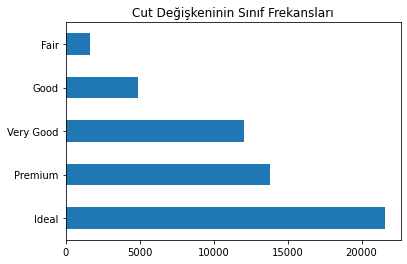

In [41]:
#barplot
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları");

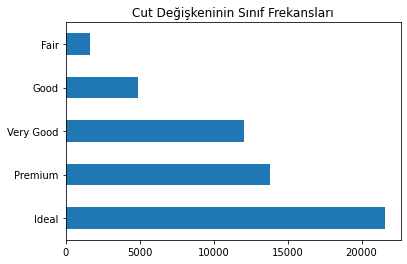

In [42]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));  # kod daha hos gorunsun

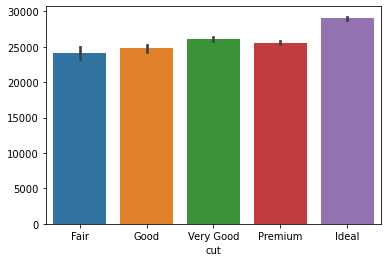

In [43]:
sns.barplot(x = "cut" , y = df.cut.index, data = df);

**Caprazlamalar**
* veri seti icerisinde bulunan degerlerin ve etkilerinin birlikte degerlendirilmesi, kirilimlarin gozlenmesi
* cut kategorik degiskeni ile price degiskeninin caprazlamasini yapacagiz 

In [44]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


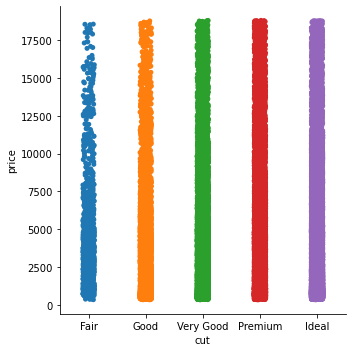

In [45]:
sns.catplot(x ="cut", y = "price", data = df);

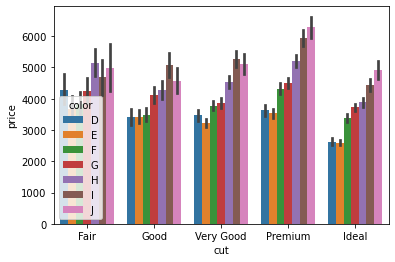

In [46]:
sns.barplot(x="cut", y="price", hue = "color", data = df);

In [47]:
# Yukarida cikan sonucta y eksenindeki fiyat araliginin degistigini gozlemliyoruz buradan sunu anlamaliyiz kullandigimiz kutuphane uc boyutlu 
# olunca kendisi ortalama degerler uzerınden islem yaparak en son grafiklerin ucuna siyah kucuk kutucuklar ekleyerek standart sapmalari bize gostermistir
# grafigimizi dogrulamak icin islem yapalim ve garfigimizle karsilastiralim
df.groupby(["cut","color"])[ "price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

**Histogram ve Yogunluk**

In [48]:
# price gibi sayisal-surekli bir degiskenin histogram ile nasil gosterildigini ogrenelim

C:\Users\technopc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


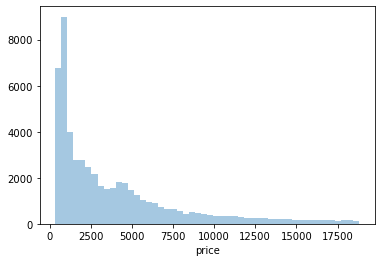

In [49]:
sns.distplot(df.price,  kde = False );  #kde yogunluk 

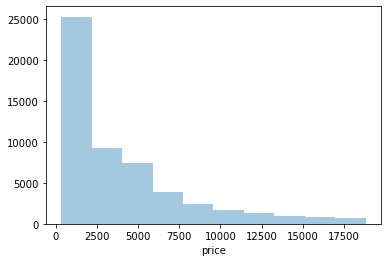

In [50]:
sns.distplot(df.price,bins = 10,  kde = False ); #bins'e kac verirsen o kadar cubuk kullanarak bu degerleri gosetermeye calisir bu da bize hassasiyet kazandirir

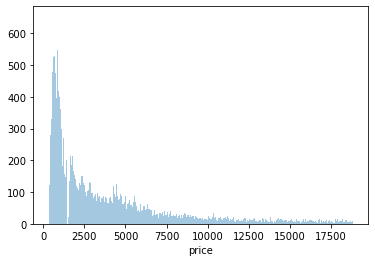

In [51]:
sns.distplot(df.price, bins=1000, kde = False );

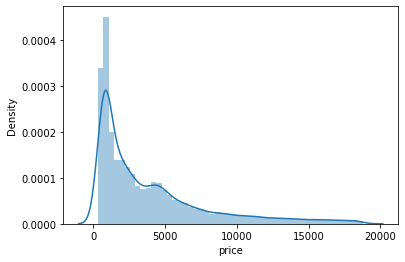

In [52]:
sns.distplot(df.price);  # dfe default olarak true degerindedir

C:\Users\technopc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


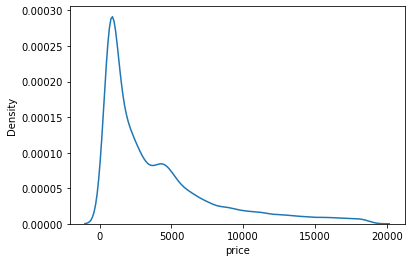

In [53]:
# sadece yogunluk icin
sns.distplot(df.price, hist=False );

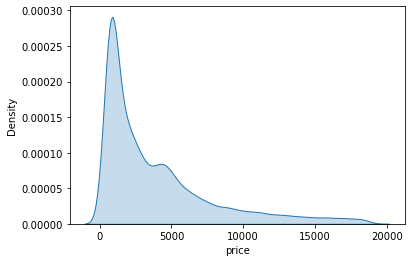

In [54]:
sns.kdeplot(df.price, shade=True );  #iki tepecik olmasi bize baska degiskenlerden etkilendigini gosterir

**Caprazlamalar**

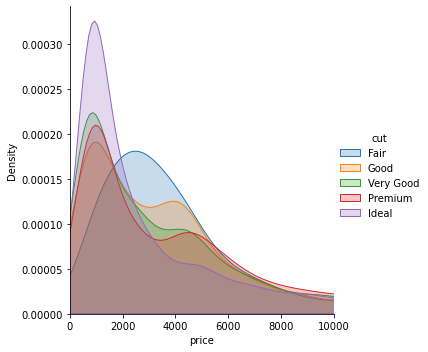

In [55]:
(sns.FacetGrid(df,
                  hue ="cut",
                  height = 5,
                  xlim= (0,10000))
    .map(sns.kdeplot, "price", shade=True)
    .add_legend()
);   # price ile gosterdigimiz yogunluk grafigine cut degiskenini de ekleyerek boyutlandirdik ve ilk 10.000 veride istedik bunu digerleri cok etkili sayida olmadigi icin 
     # add_legend() fonksiyonu bize cut degiskeninin kategori isimlerini eklememizi sagladi

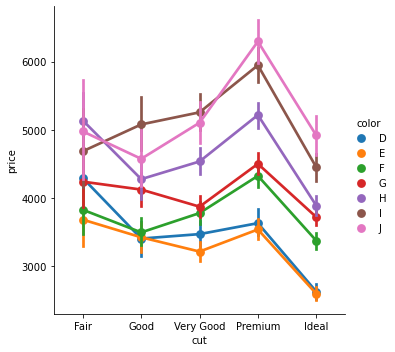

In [56]:
sns.catplot(x="cut", y="price", hue="color", kind="point", data=df );

**Boxplot**

In [75]:
# sayisal/surekli degiskenler icin kullanilir 
# medyan bilgi verir -ortadaki cizgi-

**Veri Seti Hikayesi**
* total_bill: yemegin toplam fiyati -bahsis ve vergi dahil-
* tip: bahsis
* sex: ucreti odeyen kisinin cinsiyeti (male=0 , female=1 )
* smoker: grupta sigara icen var mi (No=0, yes=1)
* day: 3=Tuhr, 4=Fri, 5=Sat , 6=Sun
* time: ne zaman?(day=0 , night=1 )
* size: grup kisi sayisi

In [58]:
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [60]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [61]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [62]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [63]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

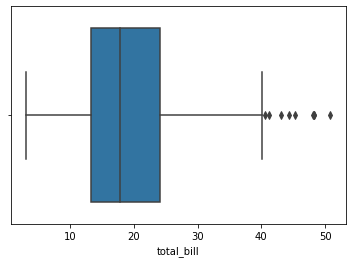

In [64]:
sns.boxplot(x = df["total_bill"]); #  40 dan sonraki noktalar aykiri gozlemler

**Kutu Grafigi Caprazlamalar**


In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


Problem: Hangi gunler daha fazla kazanıyoruz ? 

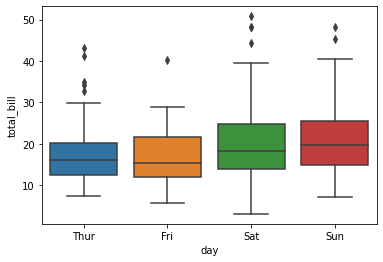

In [67]:
sns.boxplot(x = "day", y = "total_bill", data=df); #pazar gunleri yukarida frekansa baktigimizda gordugumuz uzere daha az musteri olmasina ragmen daha fazla kazanc elde edilmis

sabah mi aksam mi daha cok kazaniyoruz?

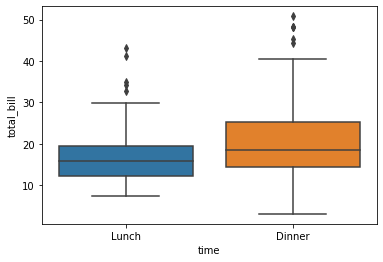

In [70]:
sns.boxplot(x="time" , y="total_bill",data=df);

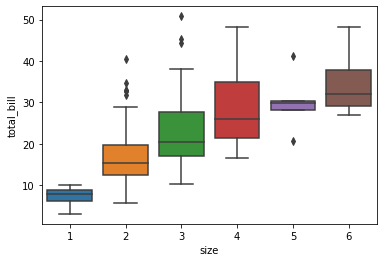

In [71]:
#kisi sayisi kazanc orani 
sns.boxplot(x="size", y="total_bill", data = df);

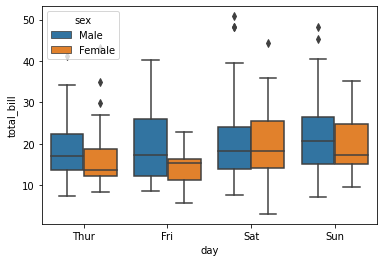

In [72]:
sns.boxplot(x = "day", y = "total_bill", hue="sex",data=df);

**VIOLIN**
* Yogunluk grafigi ile kutu grafiginin kesisimidir
* Dagilim hakkinda bize bilgi verir

In [73]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


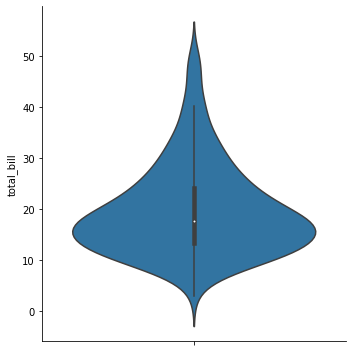

In [74]:
sns.catplot(y="total_bill", kind="violin", data=df);

**Violin Caprazlamalar**

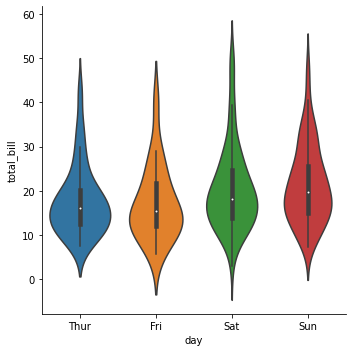

In [76]:
sns.catplot(x="day",y="total_bill", kind="violin", data=df);

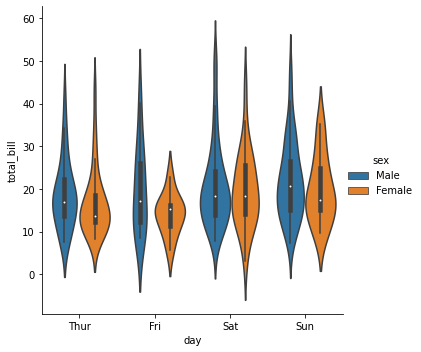

In [77]:
sns.catplot(x = "day", y = "total_bill", hue="sex",kind="violin",data=df);

**KORELASYON**
* Iki degisken arasindaki iliski

**Scatterplot** (en yaygini)
* ayni anda iki sayisal degiskenin ortaya cikardigi iliskisel yapinin incelenmesi

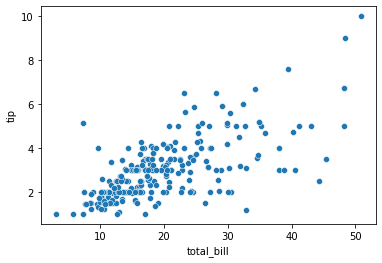

In [78]:
sns.scatterplot(x="total_bill", y="tip", data=df);

**Caprazlamalar**

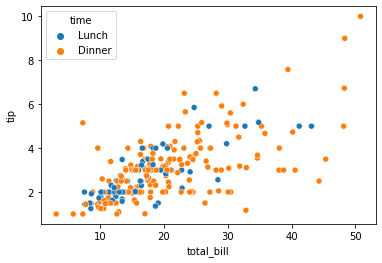

In [79]:
#uzerine kategorik bir degiskeni boyut olarak ekleyelim
sns.scatterplot(x="total_bill", y="tip",hue="time", data=df);

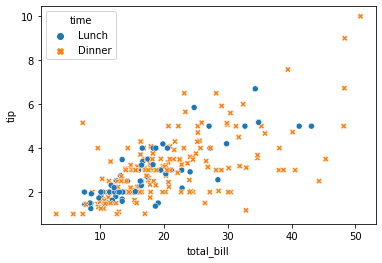

In [81]:
sns.scatterplot(x="total_bill", y="tip",hue="time", style="time" ,data=df);

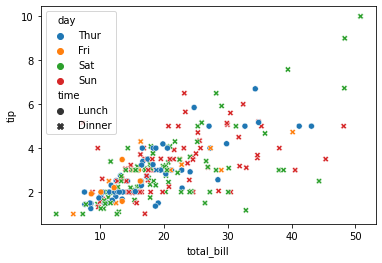

In [82]:
sns.scatterplot(x="total_bill", y="tip",hue="day", style="time" ,data=df);

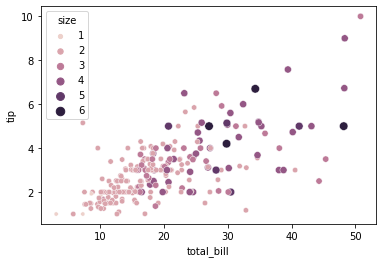

In [85]:
#sayisal bir degiskeni boyut olarak ekleyelim - size diyerek eklememiz gerekiyor-
sns.scatterplot(x="total_bill", y="tip",hue="size",size = "size" ,data=df);

**Dogrusal Iliskinin Gosterilmesi**

In [86]:
import matplotlib.pyplot as plt

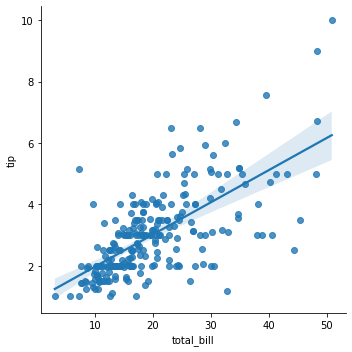

In [87]:
sns.lmplot(x="total_bill", y="tip", data = df);

dogrunun etrafindaki acik renk sapmalari gostermekte

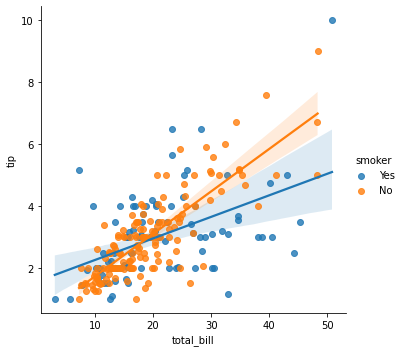

In [88]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data = df);

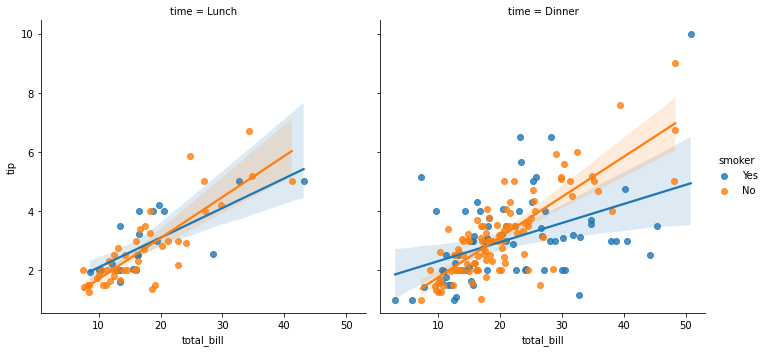

In [89]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data = df);

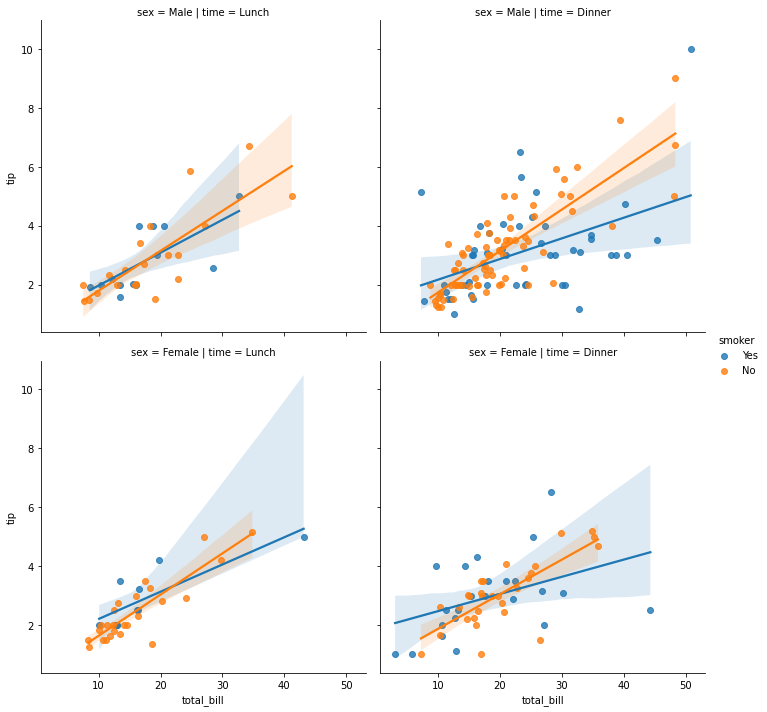

In [90]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time",row="sex", data = df);

**SCATTERPLOT MATRISI**

In [93]:
iris= sns.load_dataset("iris")
df=iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [94]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

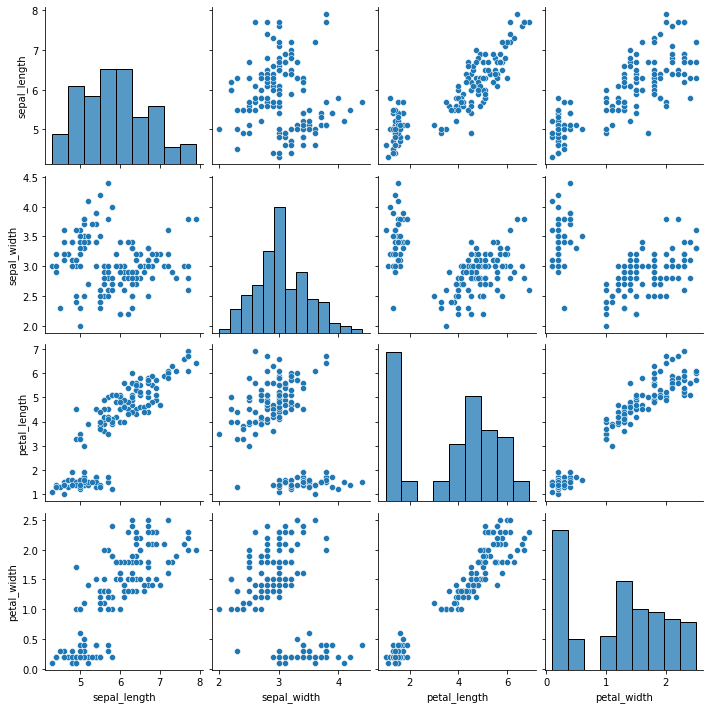

In [96]:
sns.pairplot(df);

* 1) scatterplot ile olusturulan grafik tozbulutu seklindeyse o iki degisken arasinda bir iliski olmadigi anlamina gelir
* 2) farkli kumelenmeler soz konusuysa farklı alt gruplar vardir ve incelenmeledir.


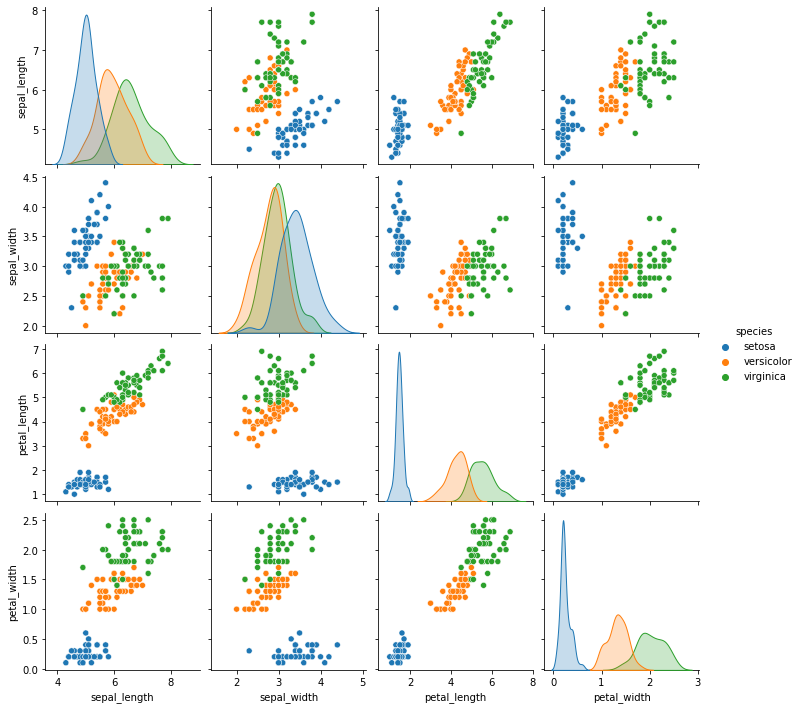

In [97]:
sns.pairplot(df, hue="species")

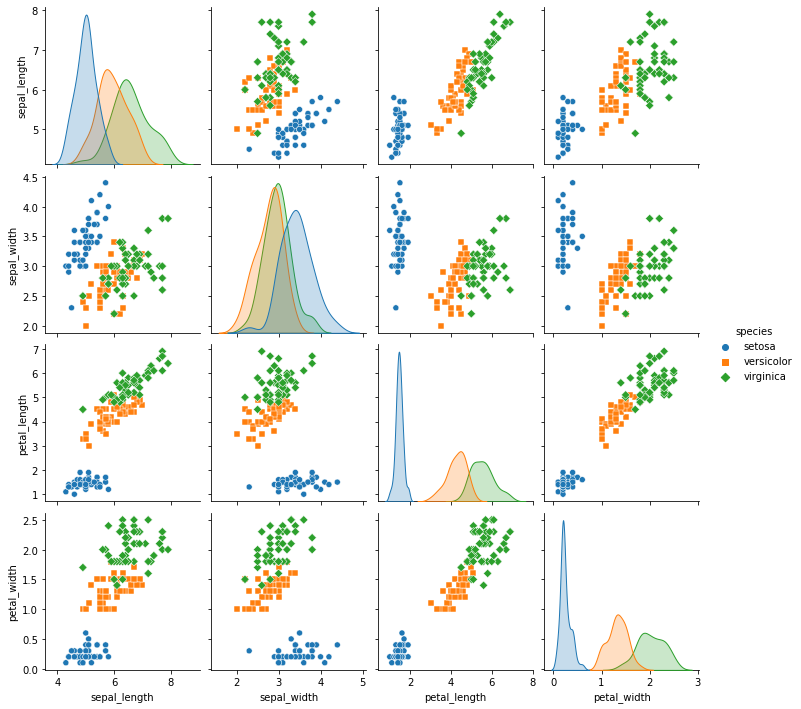

In [98]:
sns.pairplot(df, hue="species", markers =["o","s","D"]);

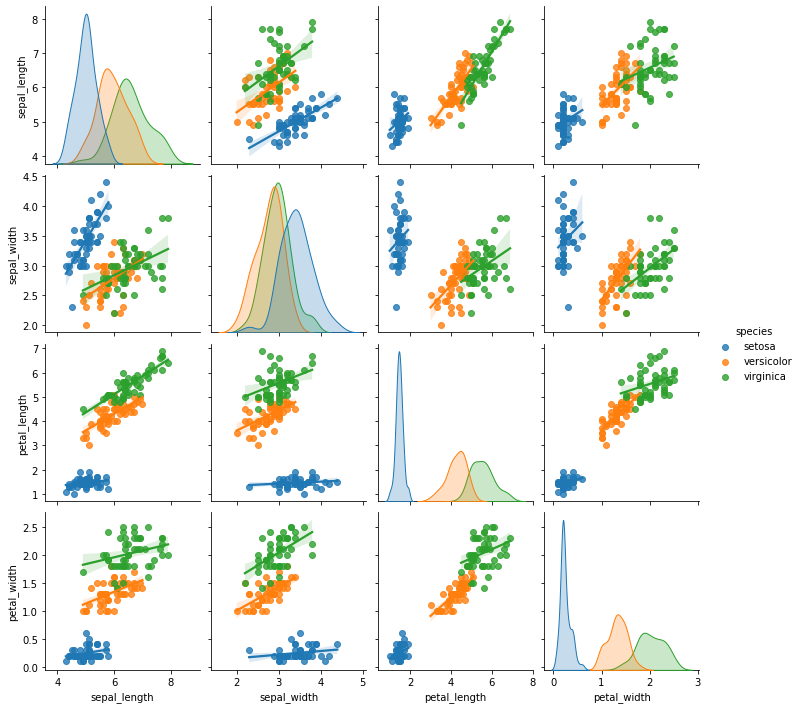

In [100]:
#her birine dogru ekleyelim
sns.pairplot(df, kind="reg", hue="species");

**HEATMAP**

Icerisinde zaman serierinin (gun,ay,yil) bulundugu verilerde ya da belirli periyotlarla tekrar eden olaylari gormek istedigimizde kullaniriz


Cok sinifli kategorik degiskeni belirli bir sayisal degiskene gore gorsellestirme ihtiyacimiz varsa kullaniriz

In [101]:
flights = sns.load_dataset("flights")
df = flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [103]:
df["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [104]:
# heatmap bizden daha yapisal bir dataset istiyor bundan pivot islemine tabi tutacagiz
df = df.pivot("month", "year", "passengers")

In [105]:
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


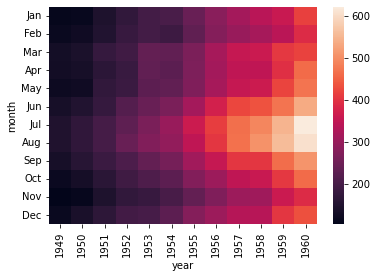

In [107]:
sns.heatmap(df);

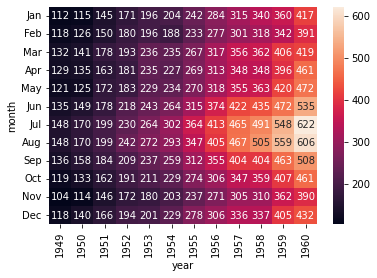

In [108]:
sns.heatmap(df, annot=True, fmt="d");

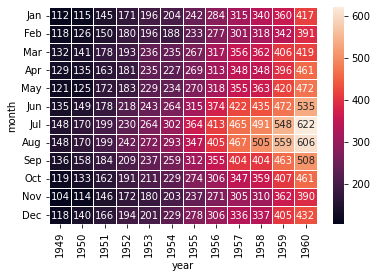

In [109]:
sns.heatmap(df, annot=True, fmt="d", linewidth= .5);

**Cizgi Grafik**

Daha zor problemlerde kullanacak oldugumuz veri gorsellestirme teknigidir.

Zamana baglı veri setlerinde ve nesnelerin interneti gib senaryolarda makinelerin urettigi verileri gorsellestirmek icin kullanacagimiz bir teknik.

In [111]:
#fmri : beyne baglanan bir cihaz ile toplanan sinyaller
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [112]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [113]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [114]:
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [116]:
df.groupby("signal").count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


**Cizgi Grafik ve Caprazlamalar**

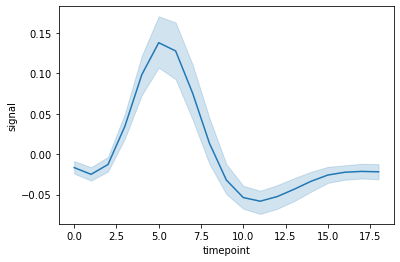

In [117]:
sns.lineplot(x="timepoint", y="signal", data=df);

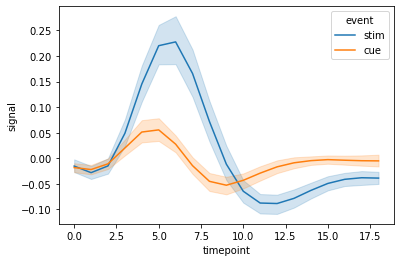

In [118]:
sns.lineplot(x="timepoint", y="signal", hue="event", data=df);

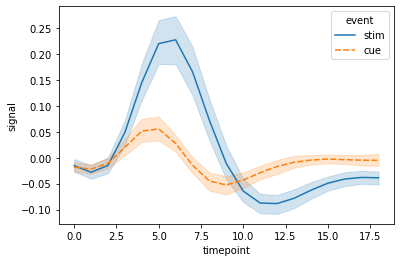

In [119]:
sns.lineplot(x="timepoint", y="signal", hue="event", style="event", data=df);

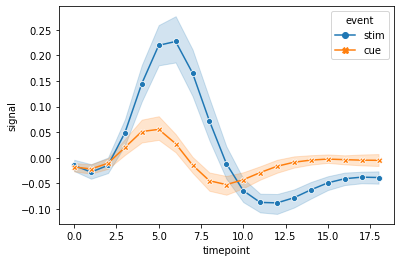

In [120]:
sns.lineplot(x="timepoint",
             y="signal",
             hue="event", 
             style="event", 
             markers = True,
             dashes = False,
             data=df);

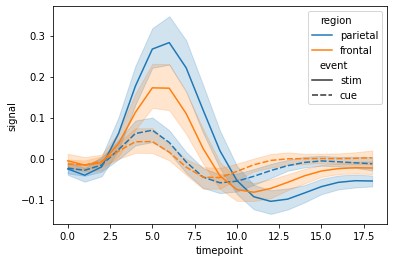

In [121]:
sns.lineplot(x="timepoint", y="signal", hue="region", style="event", data=df);

**Basit Zaman Serisi Grafigi**

In [123]:
!pip install pandas_datareader
import pandas_datareader as pr


In [124]:
df = pr.get_data_yahoo("AAPL", start = "2016-01-01", end="2019-08-25")

TypeError: string indices must be integers

In [ ]:
df.head()